# Power Up Research Software Development with Github Copilot


### 1.0 Data loading

#### 1.1 Load the cleaned CSV file

In [fm-ad-notebook-processing.ipynb](fm-ad-notebook-processing.ipynb), we took what we learned from [fm-ad-notebook-exploration.ipynb](fm-ad-notebook-exploration.ipynb) and performed several data processing methods to clean our dataset. Now we are finally ready to do some analysis and create cool visualizations of our dataset.

First, let's import our cleaned dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
combined_data_cleansed_df = pd.read_csv('combined_data_cleaned.csv')

Let's rename our dataframe to df so that it will be easier to use the code suggestions from GitHub Copilot chat.

In [3]:
df = combined_data_cleansed_df

#### 1.2 Set output display

To effectively view and analyze the dataset, we need to configure pandas to display all columns and most rows of the dataframe.

In [4]:
pd.set_option("display.max_columns", None)  # or 1000
pd.set_option("display.max_rows", None)  # or 1000

Before we proceeed to the next section, let's do some sanity check of our cleaned dataset. Let's check the first few records, dimension, and column information about the dataframe. Create prompts below to do so.

In [5]:
# show first few records
print(df.head())

                                case_id project_id  \
0  00016c8f-a0be-4319-9c42-4f3bcd90ac92      FM-AD   
1  00048fa6-4318-42ef-9709-7dedb0d938b3      FM-AD   
2  00061f34-c891-4f9c-b8d6-3ca68b98c875      FM-AD   
3  000aa4f6-473f-4cc1-9392-ab8872019fe7      FM-AD   
4  000da8b9-7511-4097-ae68-2c0f0cfe6f85      FM-AD   

                                        project.name  \
0  Foundation Medicine Adult Cancer Clinical Data...   
1  Foundation Medicine Adult Cancer Clinical Data...   
2  Foundation Medicine Adult Cancer Clinical Data...   
3  Foundation Medicine Adult Cancer Clinical Data...   
4  Foundation Medicine Adult Cancer Clinical Data...   

             cases.disease_type cases.primary_site demographic.gender  \
0     Epithelial Neoplasms, NOS             Breast             female   
1  Adenomas and Adenocarcinomas  Bronchus And Lung               male   
2  Ductal and Lobular Neoplasms           Pancreas             female   
3  Adenomas and Adenocarcinomas            Sto

In [6]:
# show df shape
df.shape

(18003, 24)

In [7]:
# show df columns
df.columns

Index(['case_id', 'project_id', 'project.name', 'cases.disease_type',
       'cases.primary_site', 'demographic.gender',
       'diagnoses.primary_diagnosis', 'diagnoses.site_of_resection_or_biopsy',
       'diagnoses.classification_of_tumor',
       'diagnoses.tissue_or_organ_of_origin', 'diagnoses.morphology',
       'samples.sample_type', 'samples.tumor_descriptor',
       'aliquots.analyte_type', 'slides.submitter_id', 'slide_id',
       'slides.percent_tumor_nuclei', 'read_groups.is_paired_end',
       'read_groups.library_selection', 'read_groups.library_strategy',
       'read_groups.platform', 'read_groups.sequencing_center',
       'read_groups.read_length', 'diagnoses.age_at_diagnosis_years'],
      dtype='object')

In [8]:
# show df column and data types
df.dtypes

case_id                                   object
project_id                                object
project.name                              object
cases.disease_type                        object
cases.primary_site                        object
demographic.gender                        object
diagnoses.primary_diagnosis               object
diagnoses.site_of_resection_or_biopsy     object
diagnoses.classification_of_tumor         object
diagnoses.tissue_or_organ_of_origin       object
diagnoses.morphology                      object
samples.sample_type                       object
samples.tumor_descriptor                  object
aliquots.analyte_type                     object
slides.submitter_id                       object
slide_id                                  object
slides.percent_tumor_nuclei              float64
read_groups.is_paired_end                   bool
read_groups.library_selection             object
read_groups.library_strategy              object
read_groups.platform

### 4.0 Data analysis and visualization

#### 4.1 Data visualization

##### Distribution of disease types

Understanding the distribution of disease types helps identify the most common and rare cancers in the dataset, which is crucial for allocating resources and prioritizing research.

<Axes: ylabel='count'>

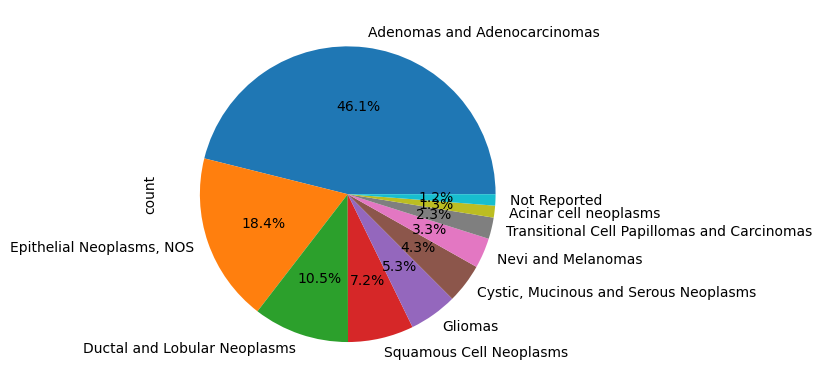

In [9]:
# create a pie chart of top 10 cases.disease_type from df
df['cases.disease_type'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

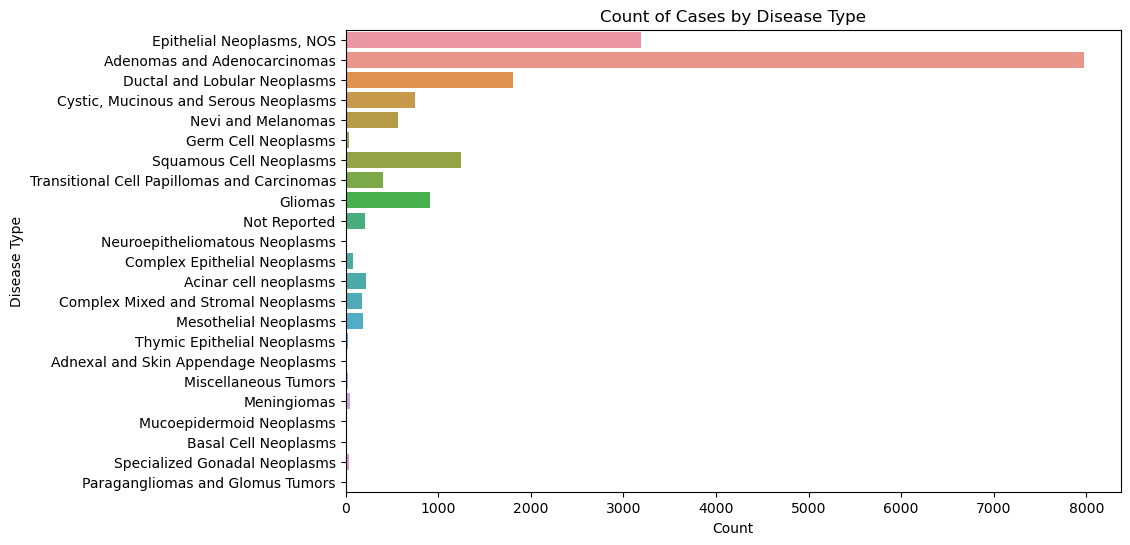

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='cases.disease_type')
plt.title('Count of Cases by Disease Type')
plt.xlabel('Count')
plt.ylabel('Disease Type')
plt.show()

##### Gender demographic

Let's take a look at how the data is distributed with respect to gender.

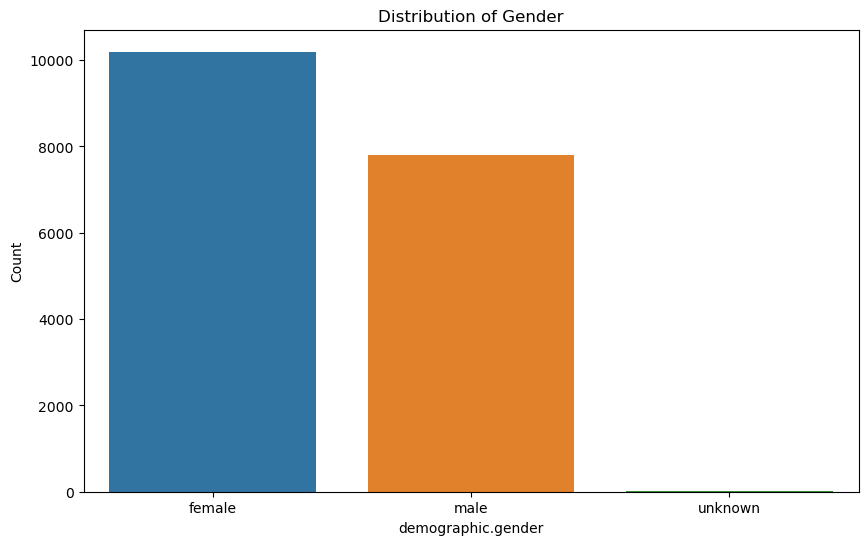

In [17]:
# show the distribution of the column demographic.gender in bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='demographic.gender')
plt.title('Distribution of Gender')
plt.xlabel
plt.ylabel('Count')
plt.show()


As we can see from above, the gender information was available from all but 9 samples and showed a slight bias toward females versus males.

According to the [study](https://aacrjournals.org/cancerres/article/77/9/2464/625134/High-Throughput-Genomic-Profiling-of-Adult-Solid), this bias can be explained in part by the large number of breast and GYN cancer samples within the dataset since both breast and gynecological cancers are specific to females. Let's try to visually see if that is the case.

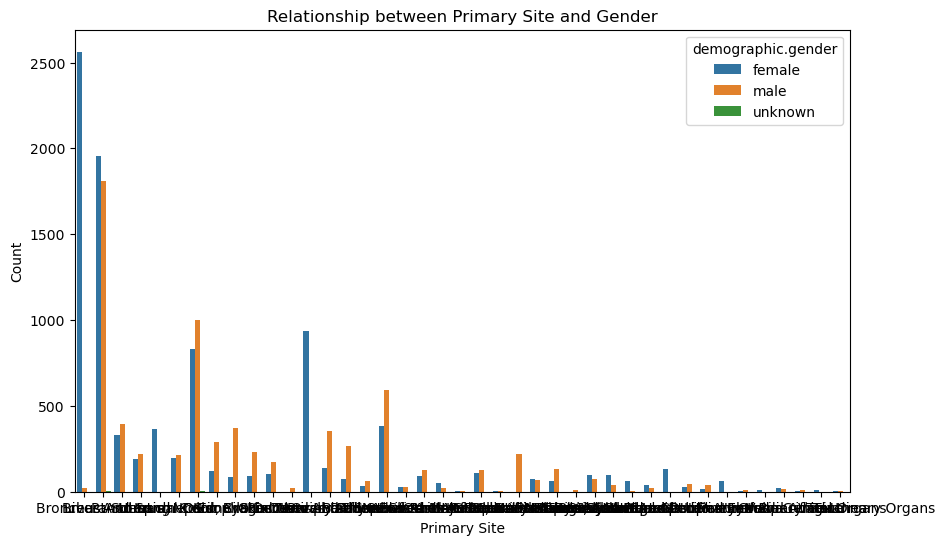

In [11]:
# show the relationship between cases.primary_site and demographic.gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cases.primary_site', hue='demographic.gender')
plt.title('Relationship between Primary Site and Gender')
plt.xlabel('Primary Site')
plt.ylabel('Count')
plt.show()


A similar analysis we can look at is the relationship between the disease type and the gender of the patient

Identifying gender differences in disease prevalence can highlight gender-specific vulnerabilities or protective factors, influencing personalized treatment approaches.

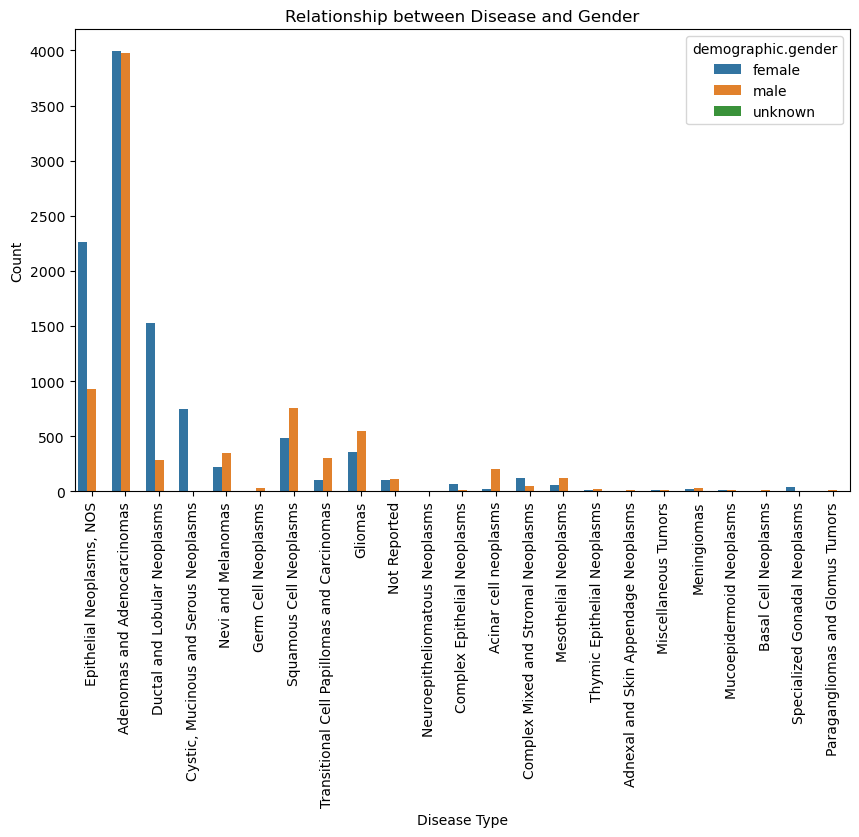

In [19]:
# visualize the relationship between cases.disease_type and demographic.gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cases.disease_type', hue='demographic.gender')
plt.title('Relationship between Disease and Gender')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()



##### Age distribution

The study "High-Throughput Genomic Profiling of Adult Solid Tumors" utilized patient samples that were part of routine clinical care, which were submitted for genomic profiling by Foundation Medicine. So the study did not do a random sampling as part of their data collection.

That being said, let's see how close to a normal distribution the dataset is with respect to age.

/opt/anaconda3/envs/githubcopilotworkshop/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


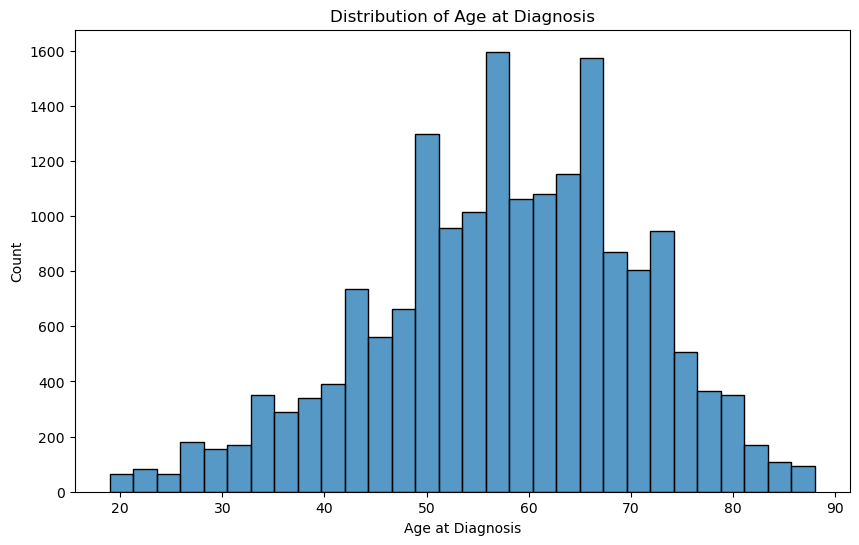

In [13]:
# show distribution of diagnoses.age_at_diagnosis_years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='diagnoses.age_at_diagnosis_years', bins=30)
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Count')
plt.show()

What is the relationship between age at diagnosis and disease type?

This question helps determine if certain cancers are more likely to occur at specific ages, which can inform targeted awareness and early detection efforts in particular demographics.

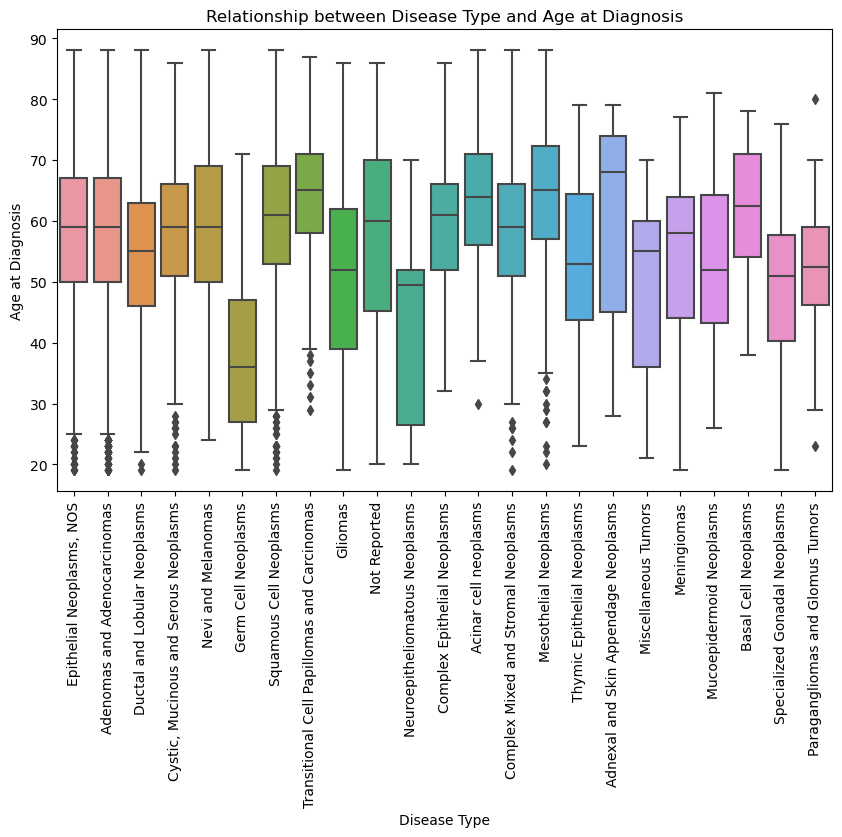

In [20]:
# show the relationship between diagnoses.age_at_diagnosis_years and disease type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cases.disease_type', y='diagnoses.age_at_diagnosis_years')
plt.title('Relationship between Disease Type and Age at Diagnosis')
plt.xlabel('Disease Type')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

Is there a relationship between the primary diagnosis and the sample type?

This question is important to understand if certain diagnoses are more likely to be made from specific types of samples, affecting diagnostic strategies and the feasibility of certain tests.

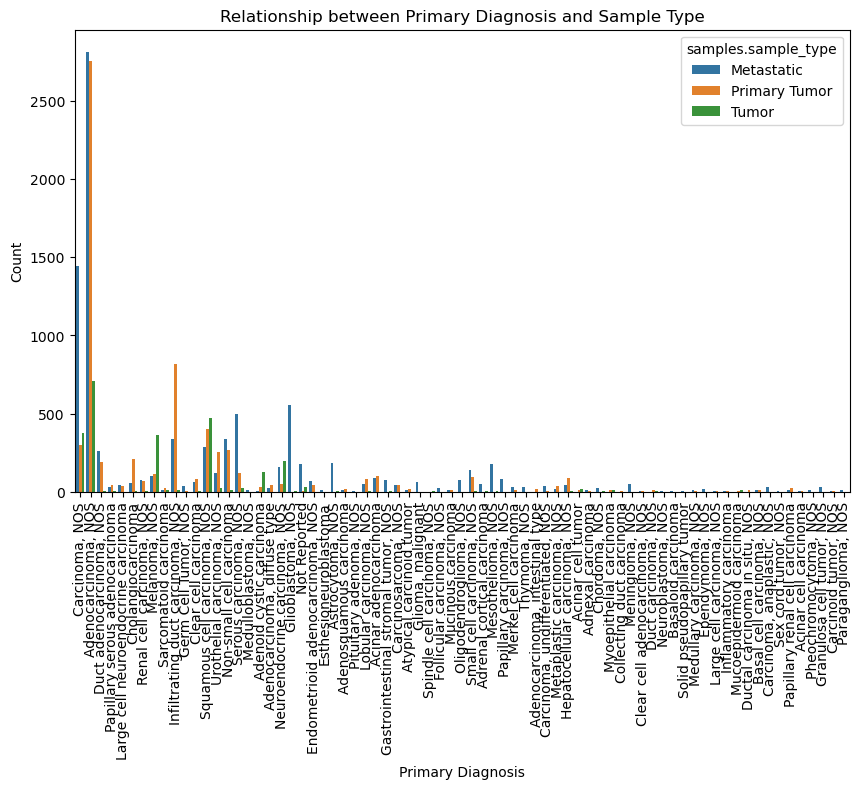

In [21]:
# show relationship between diagnoses.primary_diagnosis and samples.sample_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diagnoses.primary_diagnosis', hue='samples.sample_type')
plt.title('Relationship between Primary Diagnosis and Sample Type')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


#### 4.X Additional analysis

Now let's share with GitHub copilot chat the columns in our dataset and what visualizations and correlations it thinks that we can create from these columns.